In [1]:
import pyutils
import torch
import glob

#load test VAD Model
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)
(get_speech_timestamps,
 _, read_audio,
 *_) = utils

# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

Downloading: "https://github.com/snakers4/silero-vad/archive/master.zip" to C:\Users\USER/.cache\torch\hub\master.zip


CUDA is available: True


## Load sample and Plot waveform

In [ ]:
sample_wav_path = "data/sample.wav"
# manually load timestamp of voice activations
speech_timestamp = {
    '0': {'start': 19488,'end': 48096} ,
    '1': {'start': 58368,'end': 77280} ,
    '2': {'start': 90624,'end': 106464} ,
    '3': {'start': 121344,'end': 141792} ,
    '4': {'start': 168960,'end': 189408} ,
    '5': {'start': 193536,'end': 213984} ,
    '6': {'start': 425472,'end': 473568}
    }
waveform, sample_rate, metadata = pyutils.load_audio_data(sample_wav_path)
mask = pyutils.create_activation_mask(speech_timestamp,metadata.num_frames)
pyutils.plot_waveform(waveform,title="Sensor Audio Waveform", sample_rate=sample_rate, mask=mask)

[-1 -1 -1 ...  1  1  1]


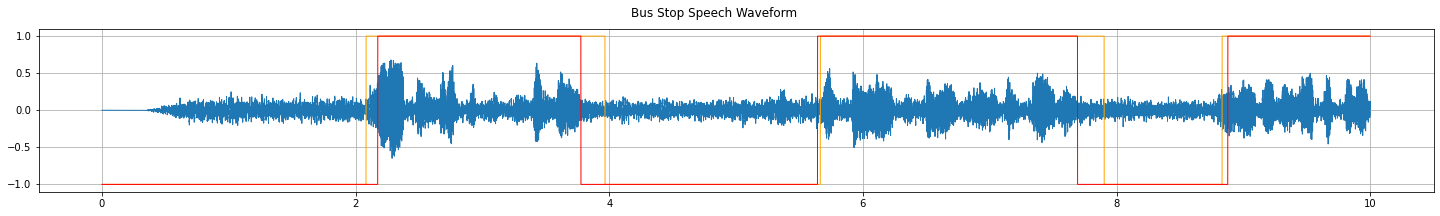

In [ ]:
noisy_wav_path = "data/noisy/record_data/bus_stop.wav"
start_second = 0 
end_second = 10
waveform, sample_rate, metadata = pyutils.load_audio_data(noisy_wav_path, start_second = start_second, end_second = end_second)
noisy_bus_validation = pyutils.get_mat_y_labels(noisy_wav_path.replace('.wav','.mat'), sample_rate = sample_rate, start_second = start_second, end_second = end_second)
noisy_speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
noisy_mask = pyutils.create_activation_mask(noisy_speech_timestamps, waveform.shape[1])
pyutils.plot_waveform(waveform, title = 'Bus Stop Speech Waveform', sample_rate = sample_rate, mask = noisy_mask, validation = noisy_bus_validation)

## Evaluate the rate of misclassification for each noisy environment 
### Environments: bus stop, construction site, park, room

In [ ]:
noisy_wav_path = "data/noisy/record_data/bus_stop.wav"
waveform, sample_rate, metadata = pyutils.load_audio_data(noisy_wav_path)
end_second = metadata.num_frames/sample_rate
noisy_bus_validation = pyutils.get_mat_y_labels(noisy_wav_path.replace('.wav','.mat'), sample_rate = sample_rate)
noisy_speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
noisy_mask = pyutils.create_activation_mask(noisy_speech_timestamps, waveform.shape[1])
print("Rate of misclassification Bus Stop data:",abs(noisy_bus_validation - noisy_mask*1).sum()/(end_second*sample_rate)*100)


Rate of misclassification Bus Stop data: 5.37392651777938


In [ ]:
noisy_wav_path = "data/noisy/record_data/construction_site.wav"
waveform, sample_rate, metadata = pyutils.load_audio_data(noisy_wav_path)
end_second = metadata.num_frames/sample_rate
noisy_bus_validation = pyutils.get_mat_y_labels(noisy_wav_path.replace('.wav','.mat'), sample_rate = sample_rate)
noisy_speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
noisy_mask = pyutils.create_activation_mask(noisy_speech_timestamps, waveform.shape[1])
print("Rate of misclassification Construction Site data:",abs(noisy_bus_validation - noisy_mask*1).sum()/(end_second*sample_rate)*100)

Rate of misclassification Construction Site data: 2.11651050045805


In [ ]:
noisy_wav_path = "data/noisy/record_data/park.wav"
waveform, sample_rate, metadata = pyutils.load_audio_data(noisy_wav_path)
end_second = metadata.num_frames/sample_rate
noisy_bus_validation = pyutils.get_mat_y_labels(noisy_wav_path.replace('.wav','.mat'), sample_rate = sample_rate)
noisy_speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
noisy_mask = pyutils.create_activation_mask(noisy_speech_timestamps, waveform.shape[1])
print("Rate of misclassification Park data:",abs(noisy_bus_validation - noisy_mask*1).sum()/(end_second*sample_rate)*100)

Rate of misclassification Park data: 4.443424812538415


In [ ]:
noisy_wav_path = "data/noisy/record_data/room.wav"
waveform, sample_rate, metadata = pyutils.load_audio_data(noisy_wav_path)
end_second = metadata.num_frames/sample_rate
noisy_bus_validation = pyutils.get_mat_y_labels(noisy_wav_path.replace('.wav','.mat'), sample_rate = sample_rate)
noisy_speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
noisy_mask = pyutils.create_activation_mask(noisy_speech_timestamps, waveform.shape[1])
print("Rate of misclassification Room data:",abs(noisy_bus_validation - noisy_mask*1).sum()/(end_second*sample_rate)*100)

Rate of misclassification Room data: 2.631103187630031


## Calculate the rate of sample misclassification for 842 noise-only clips

In [6]:

# Initialisations 
start_second = 0 
end_frames = 0
total_experiments = 100
failed_experiment, experiments = 0, 0 
accuracy, false_positives = 0, 0

# Iterate through files in noise folder
for file in glob.glob("data/musan/noise/free-sound/*.wav"):
    # Experiment counter 
    experiments += 1
    summation = 0
    wav_path = file

    # load audio data 
    waveform, sample_rate, metadata = pyutils.load_audio_data(wav_path, start_second = start_second)

    # calcuate running total number of frames
    end_frames += metadata.num_frames

    # predict voice activations 
    speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)

    # create mask from predictions 
    mask = pyutils.create_activation_mask(speech_timestamps, waveform.shape[1])

    # find the running number of activations which are misclassifications
    summation = sum(mask*1)
    false_positives += summation

accuracy = false_positives/(end_frames)*100
print("The Silero VAD has a failed sample percentage of", accuracy)

The Silero VAD has a failed sample percentage of 2.425811972413032


## Plot 100 waveforms of noise-only audio to visualise misclassification

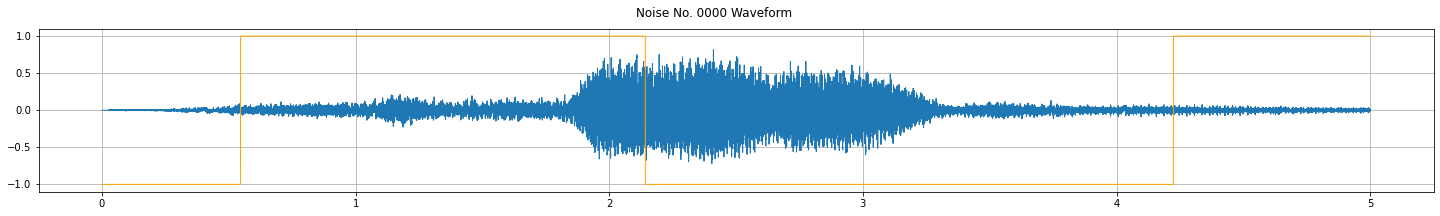

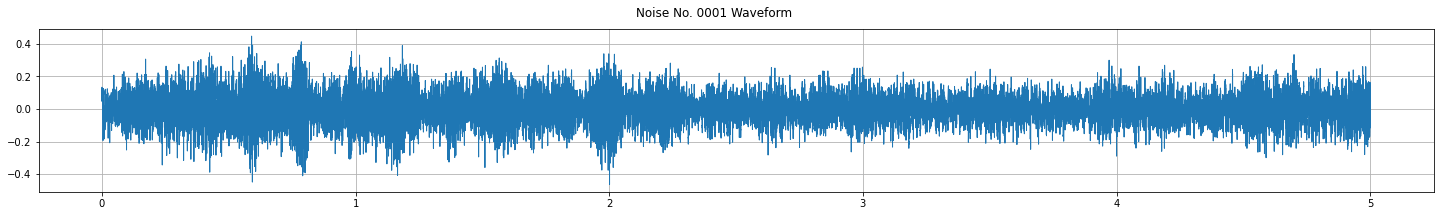

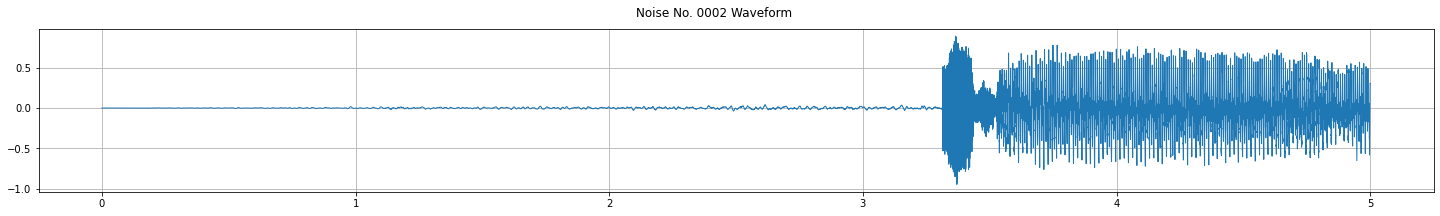

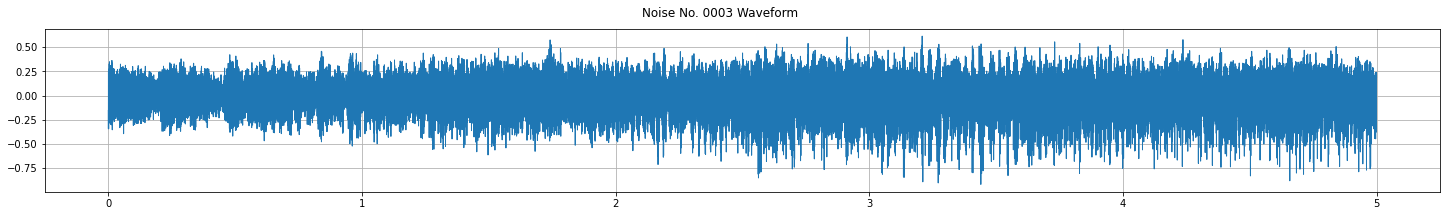

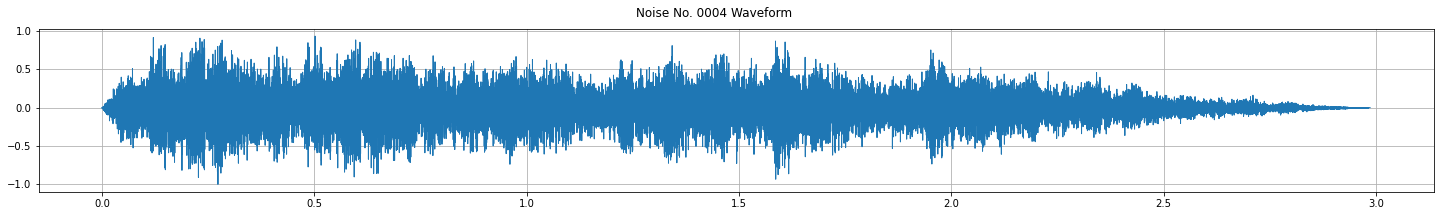

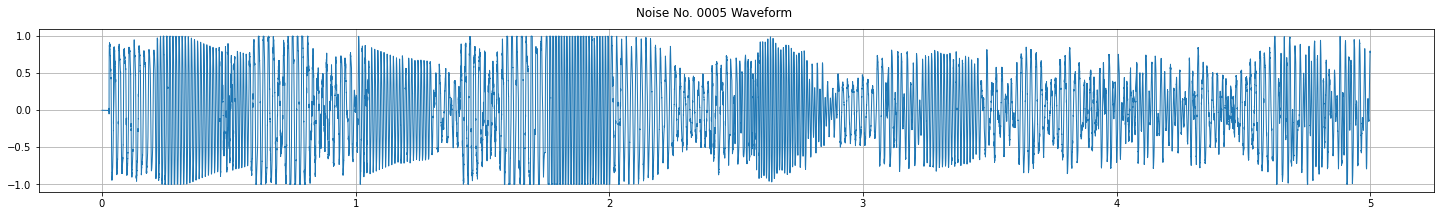

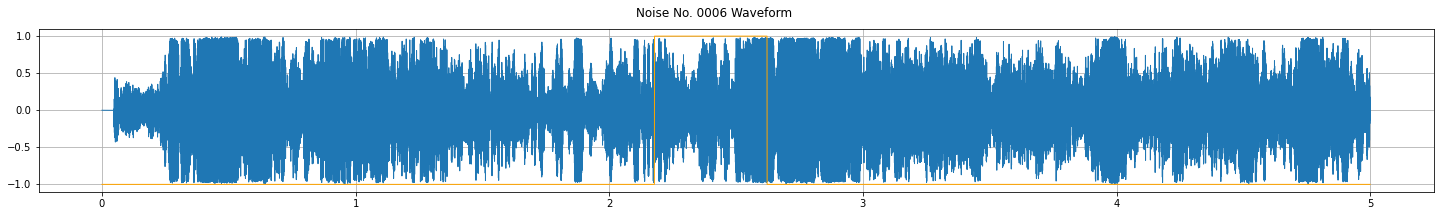

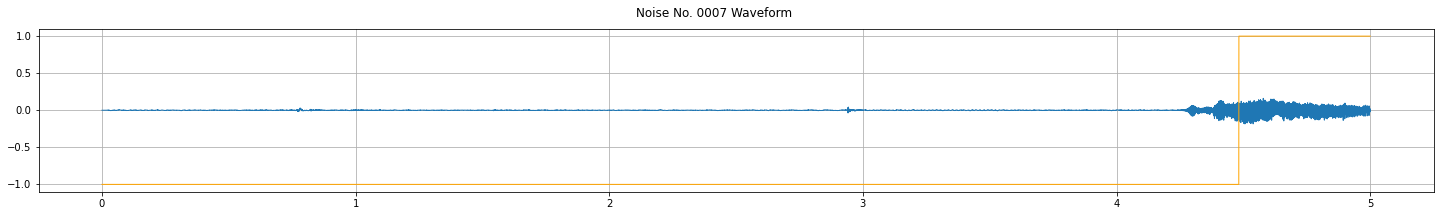

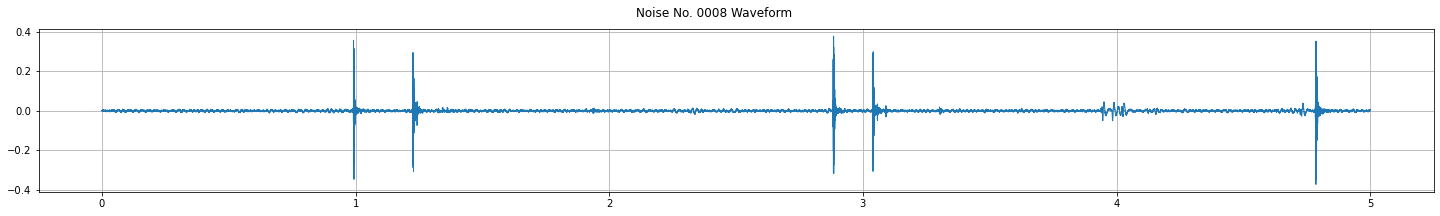

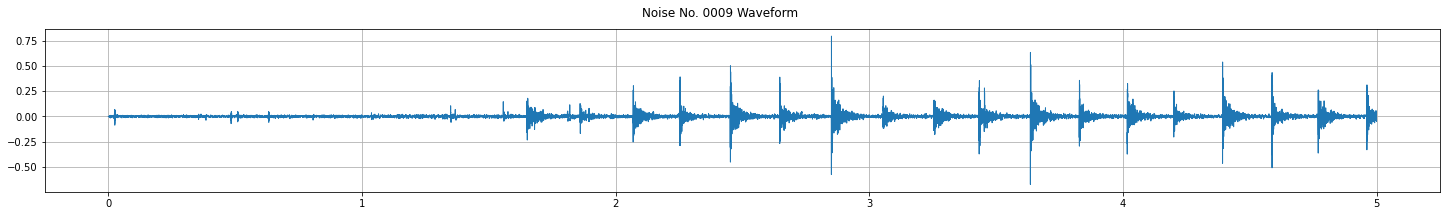

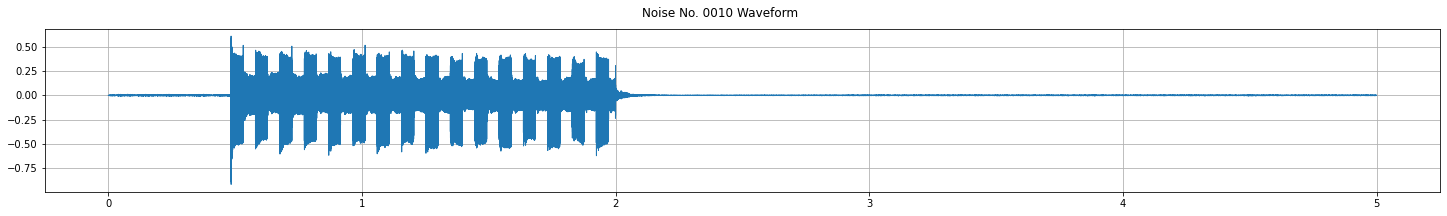

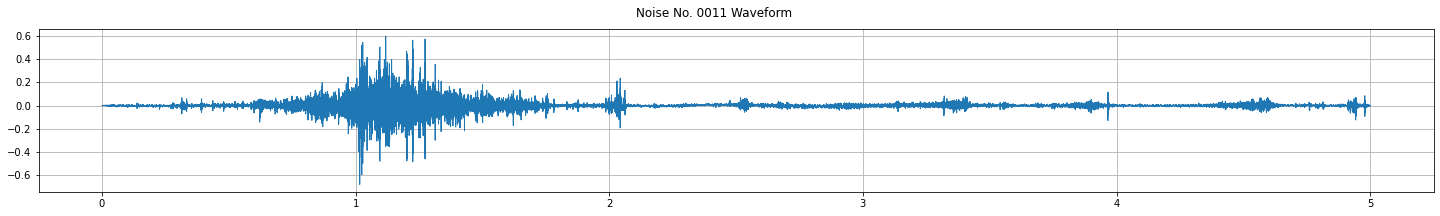

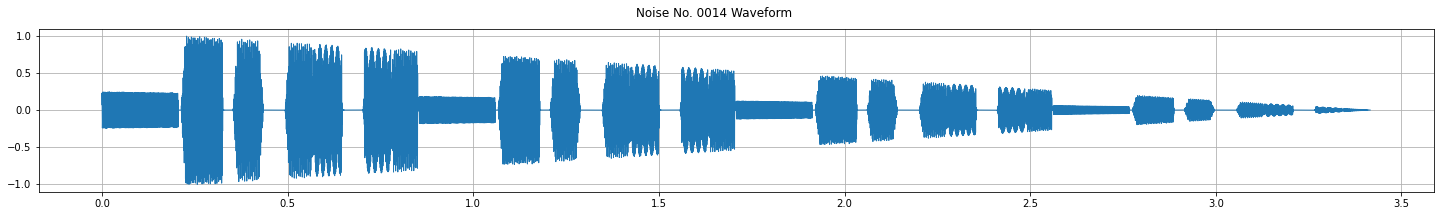

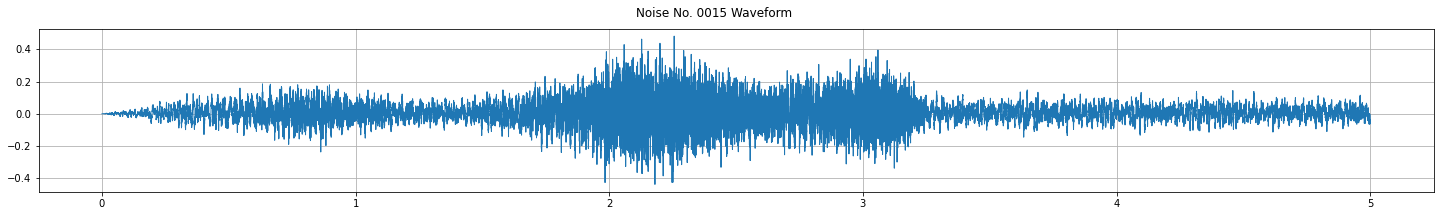

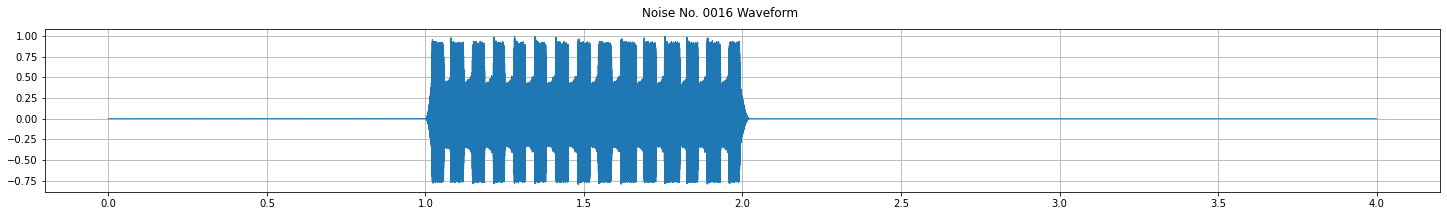

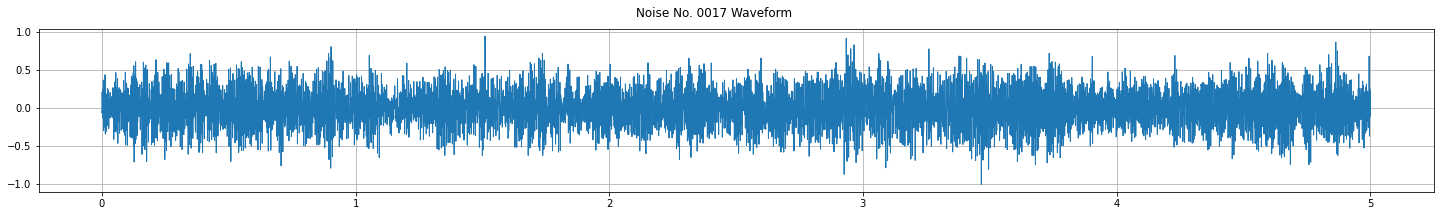

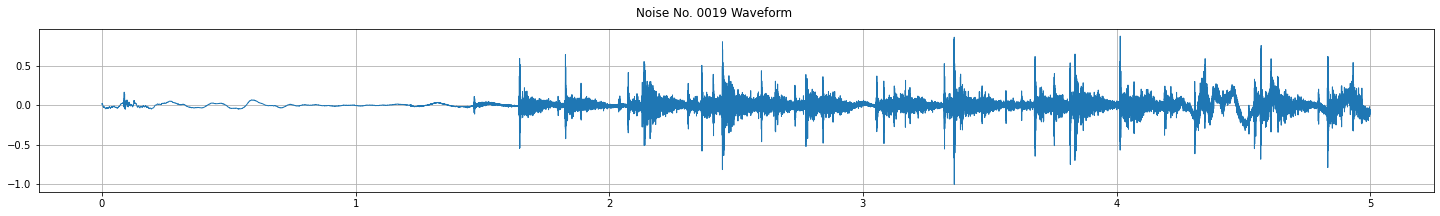

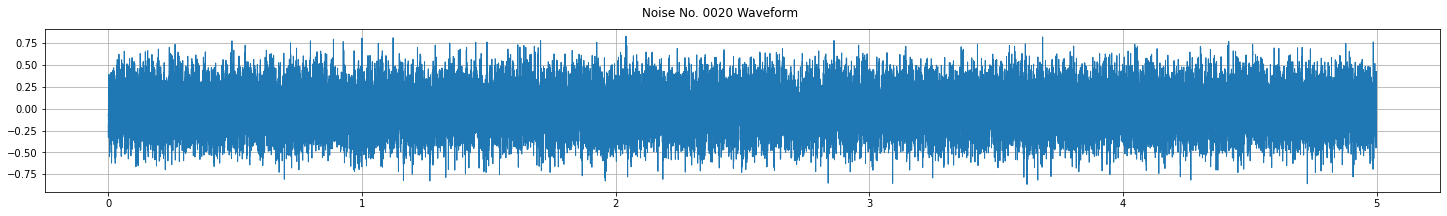

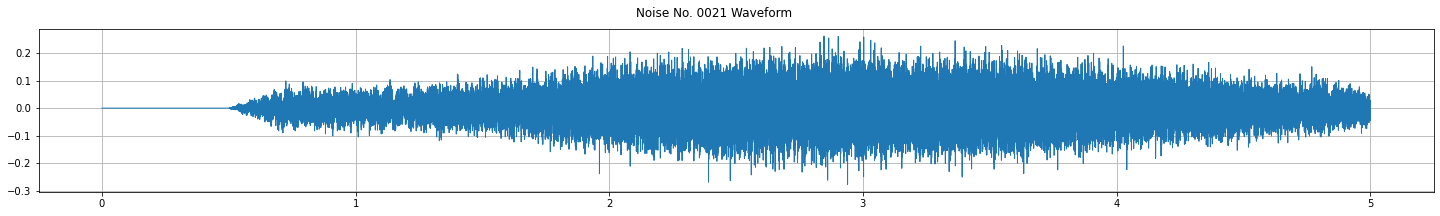

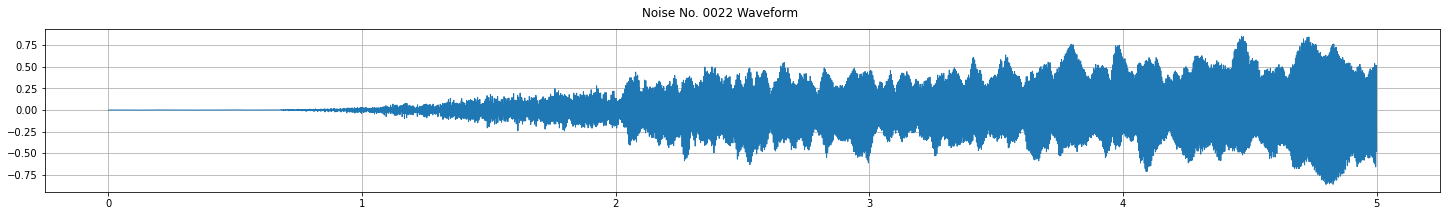

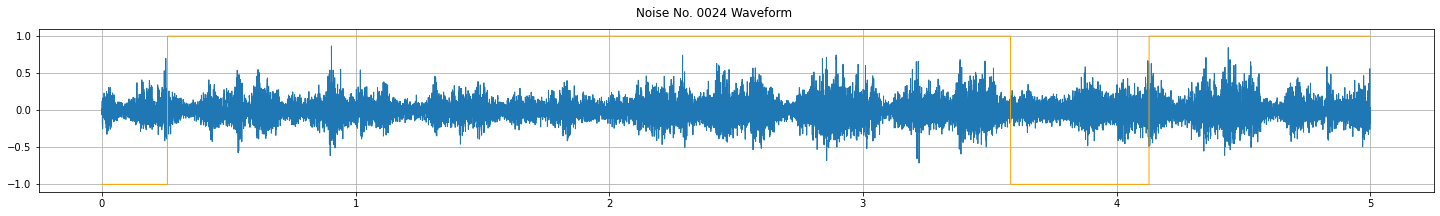

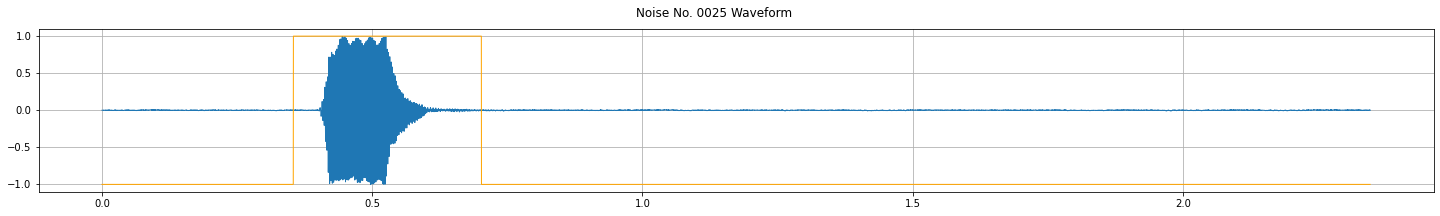

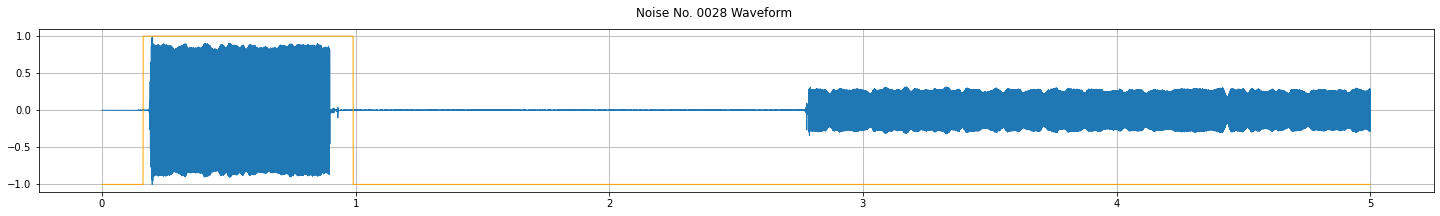

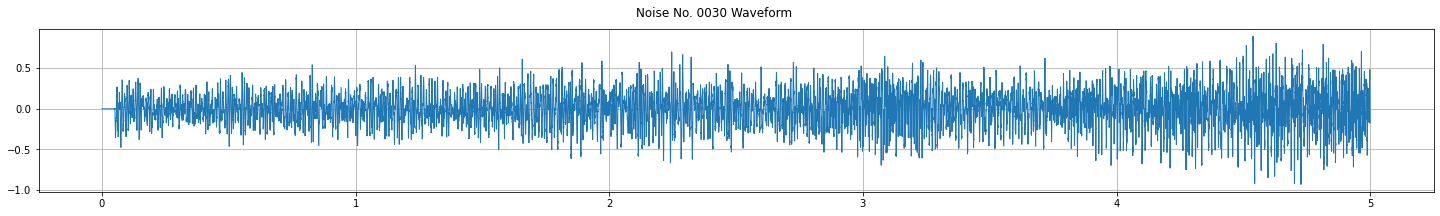

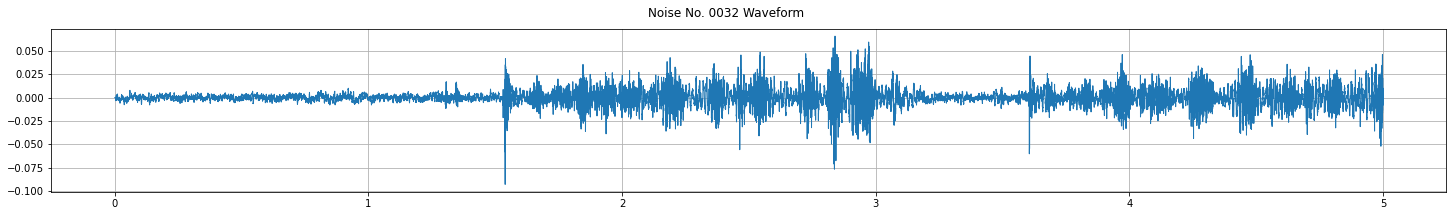

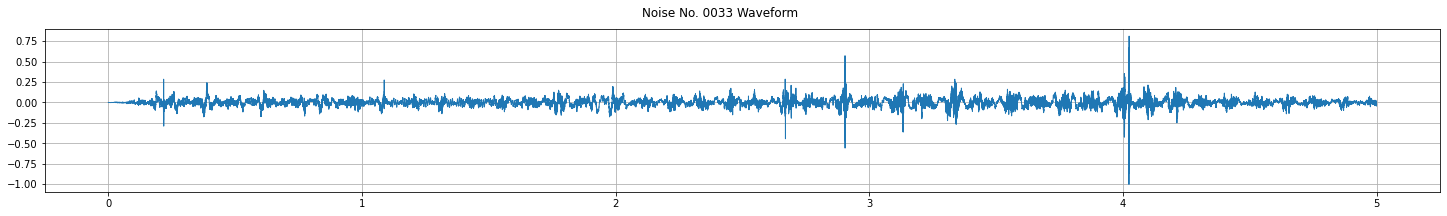

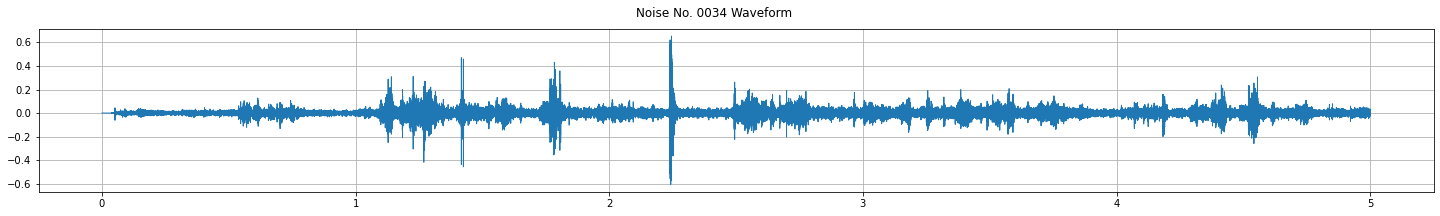

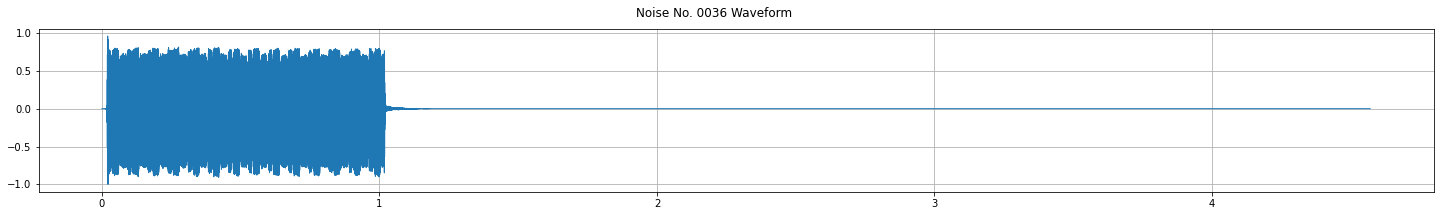

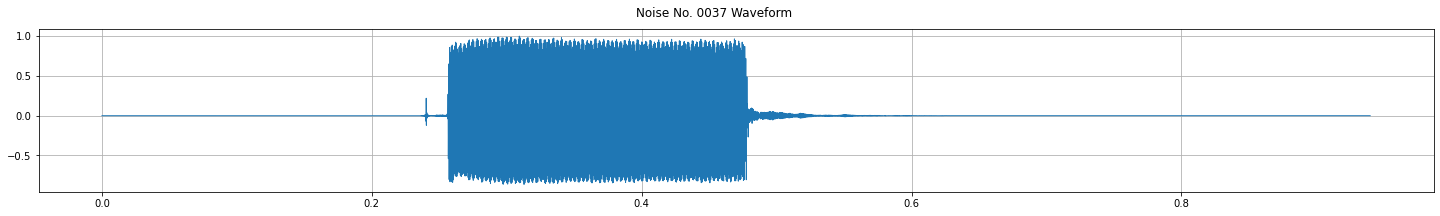

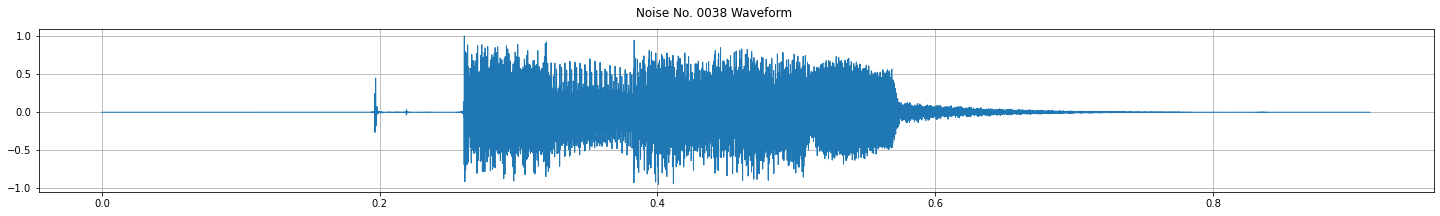

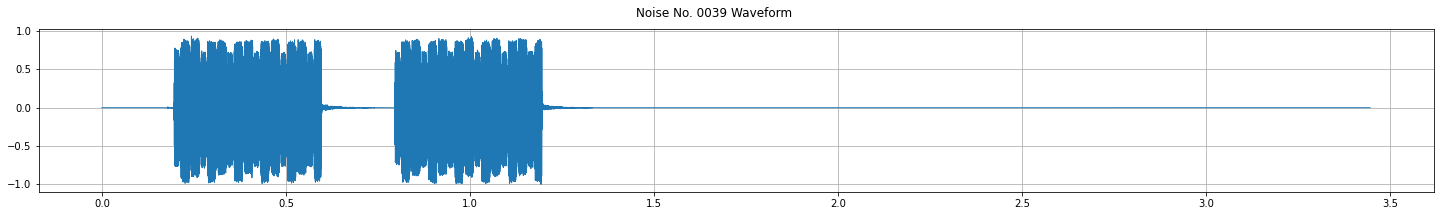

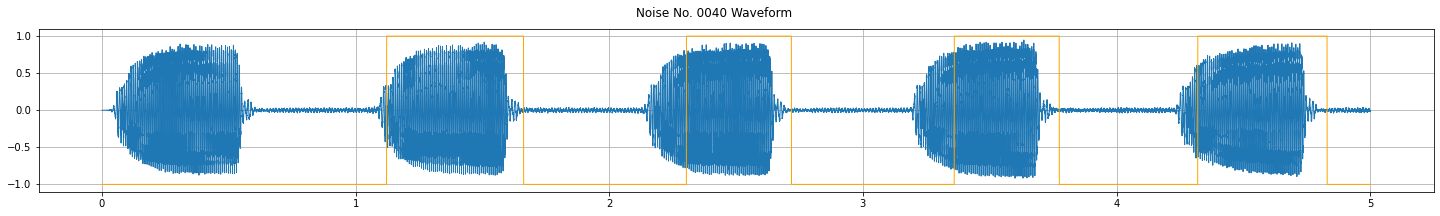

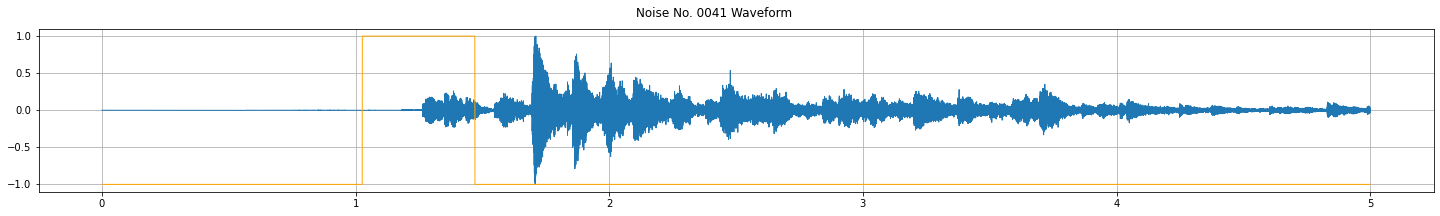

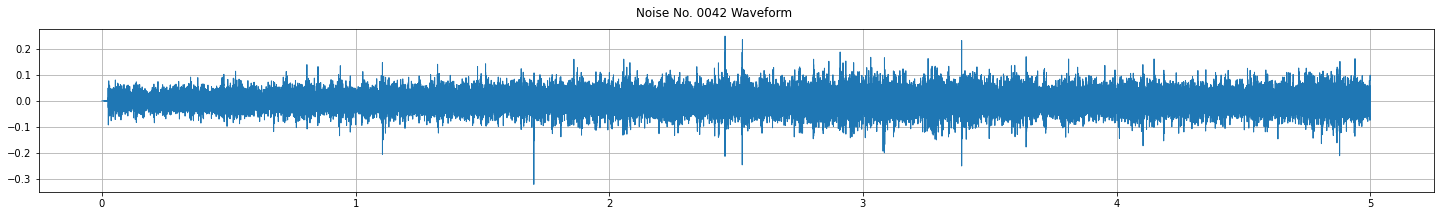

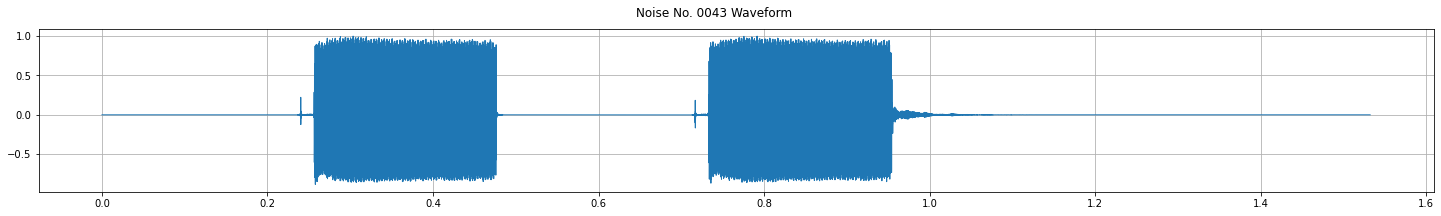

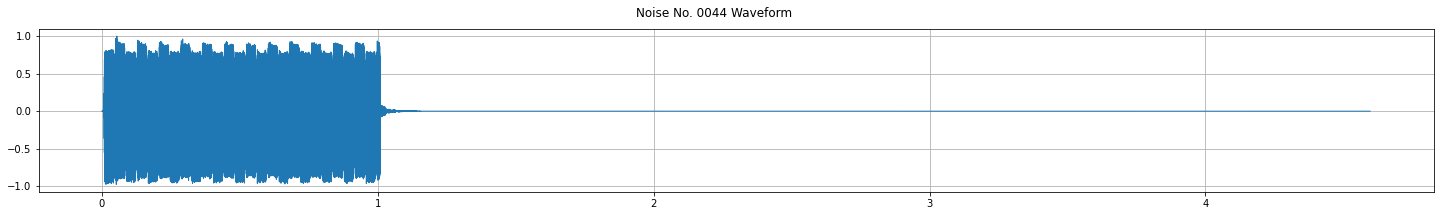

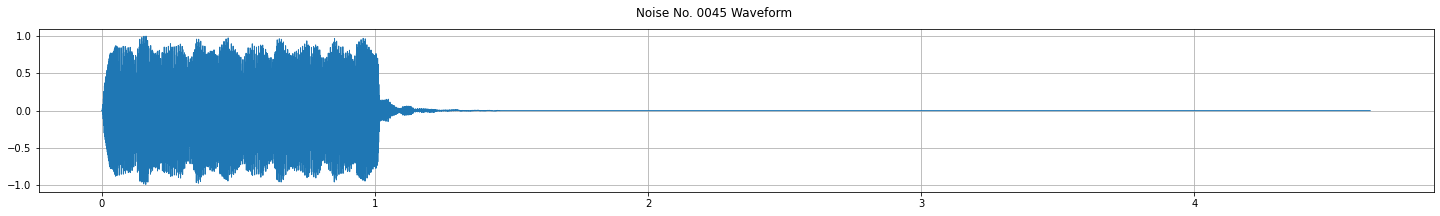

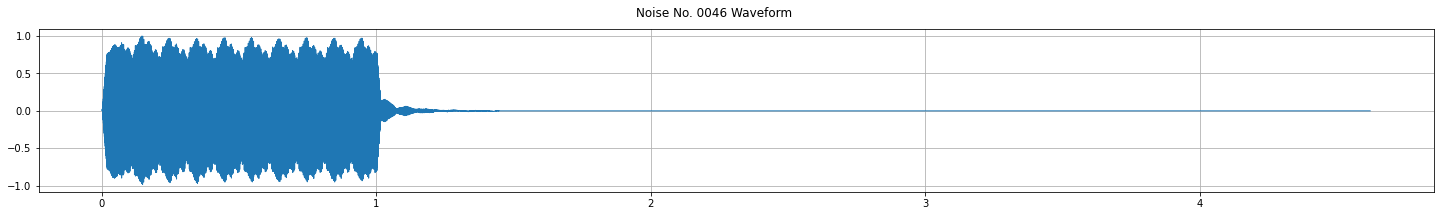

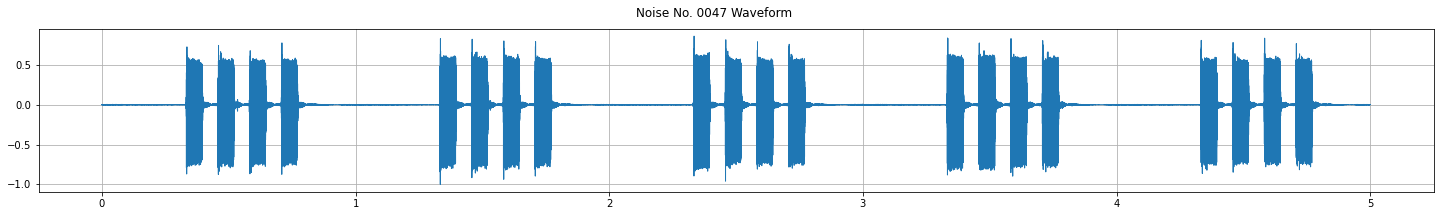

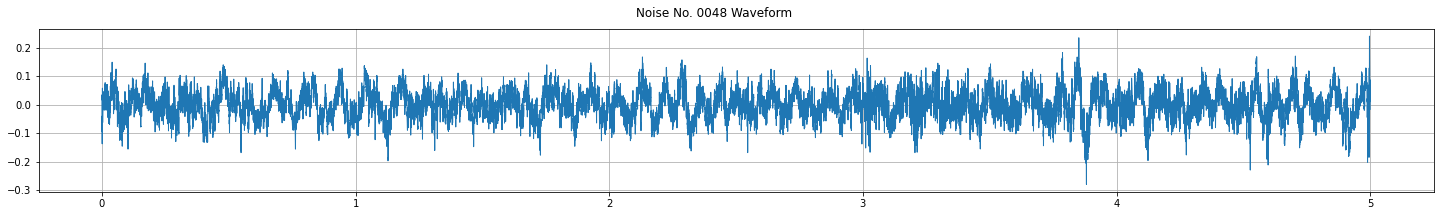

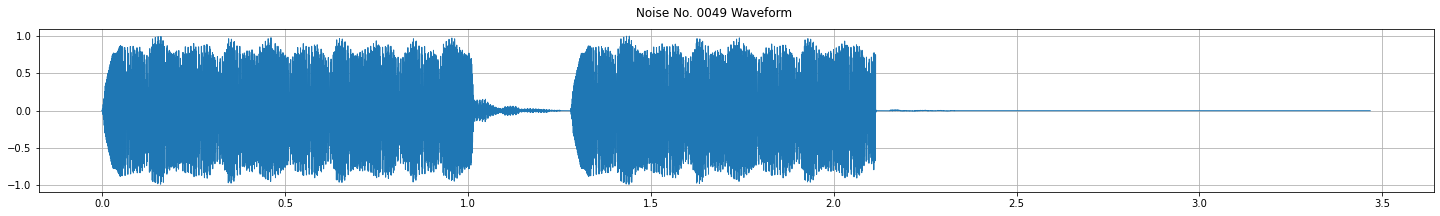

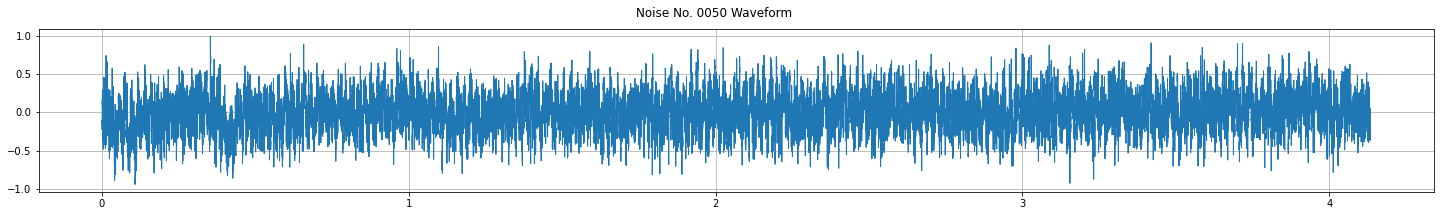

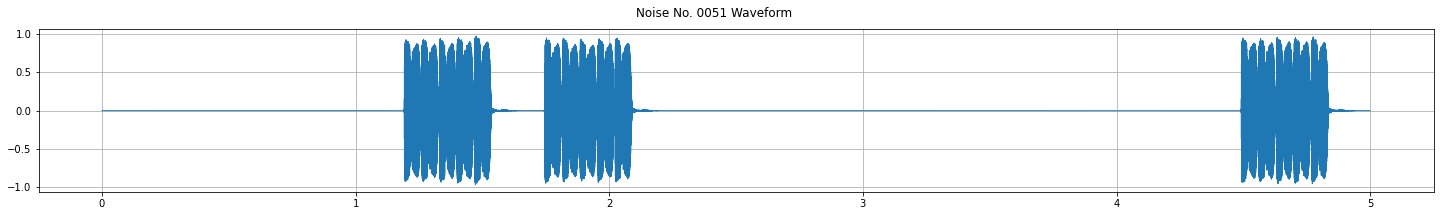

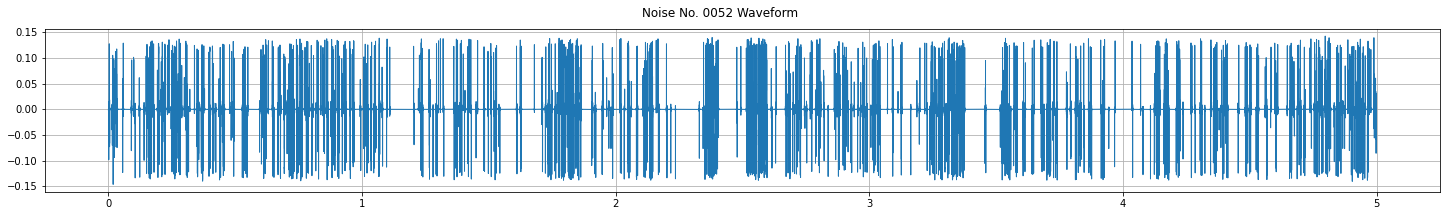

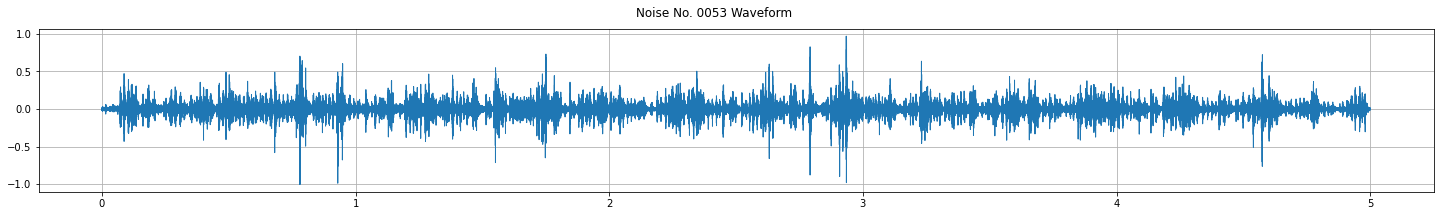

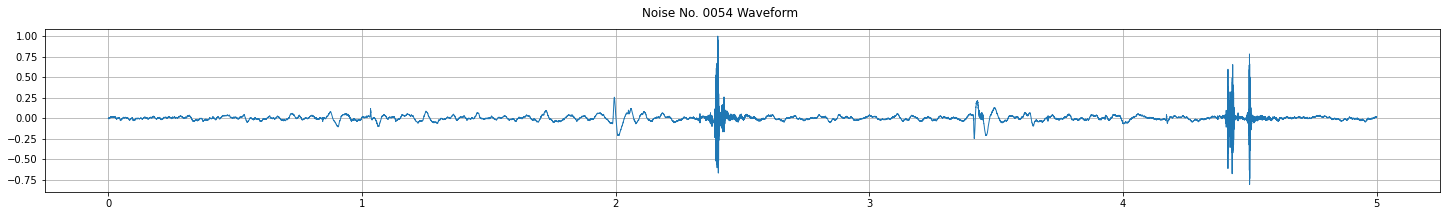

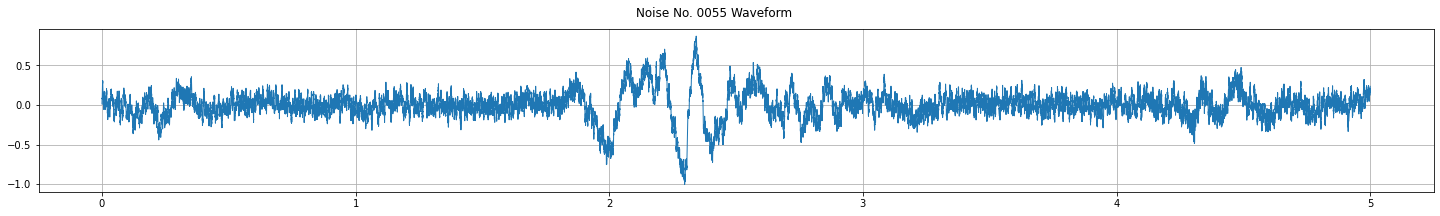

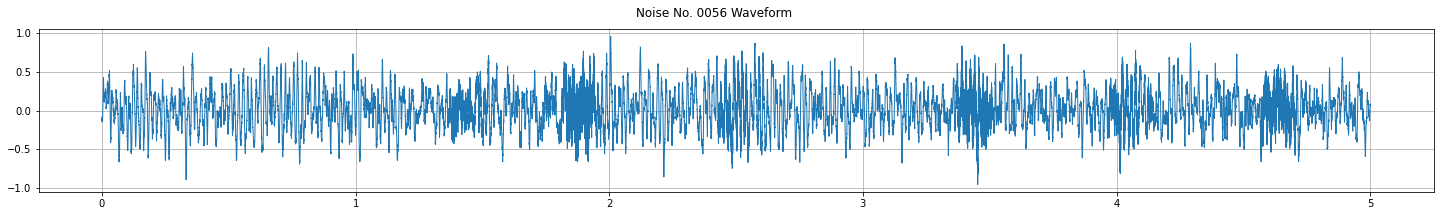

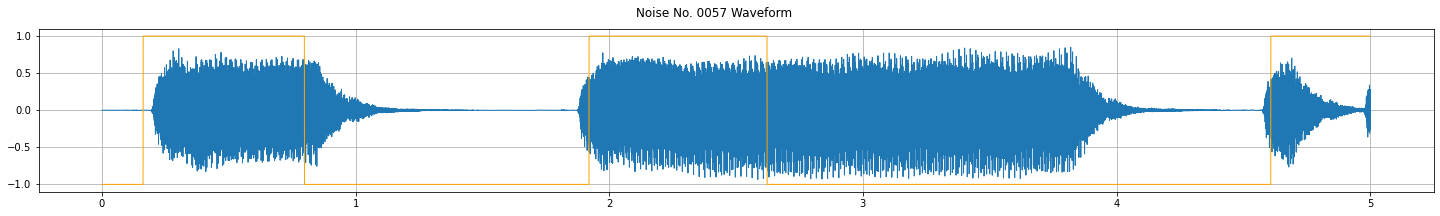

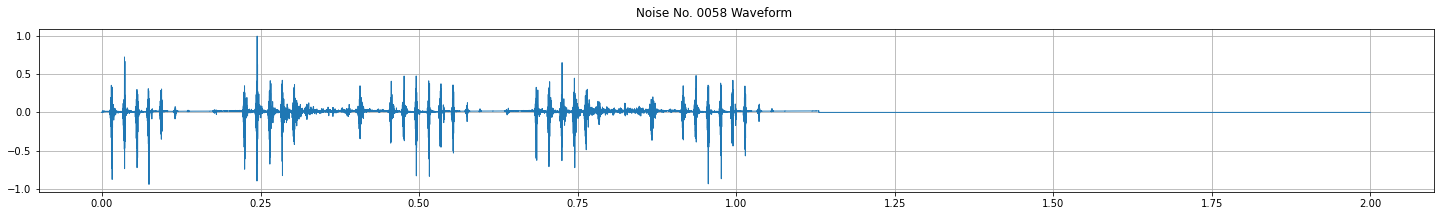

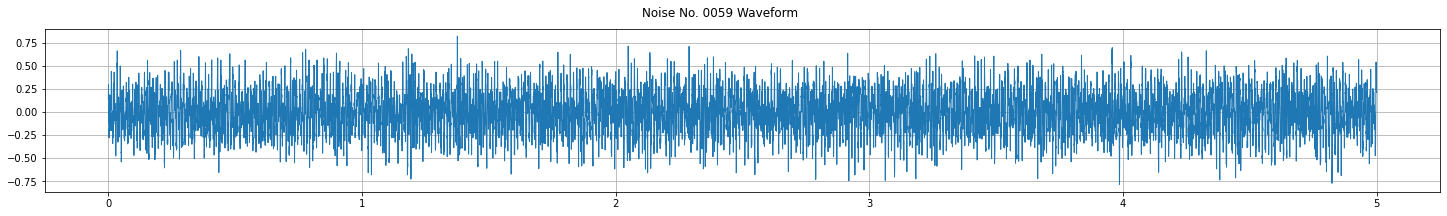

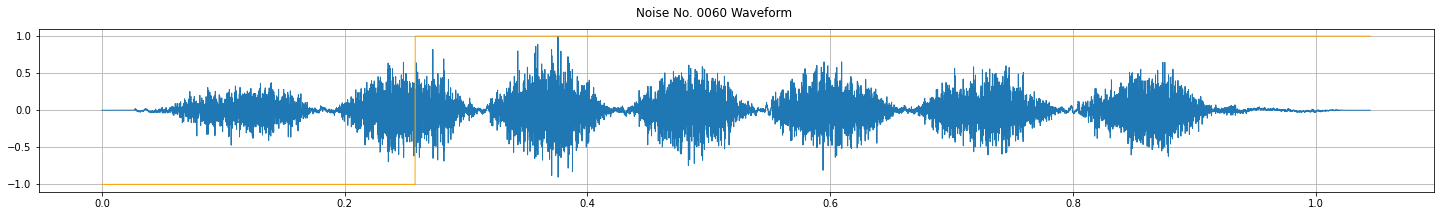

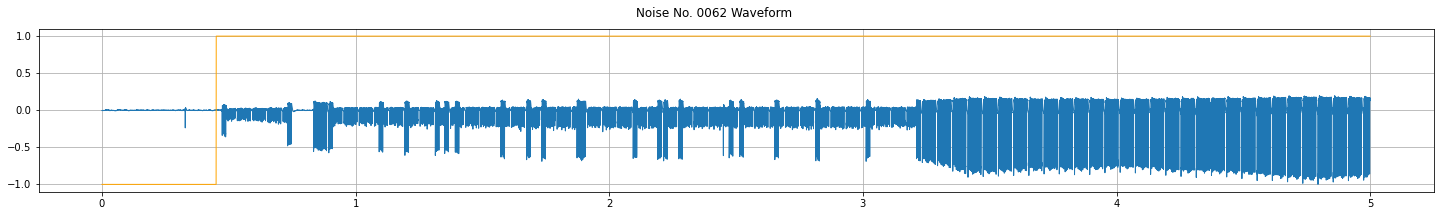

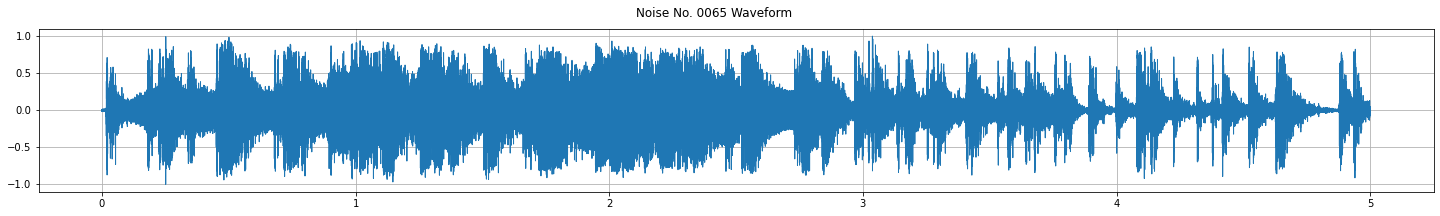

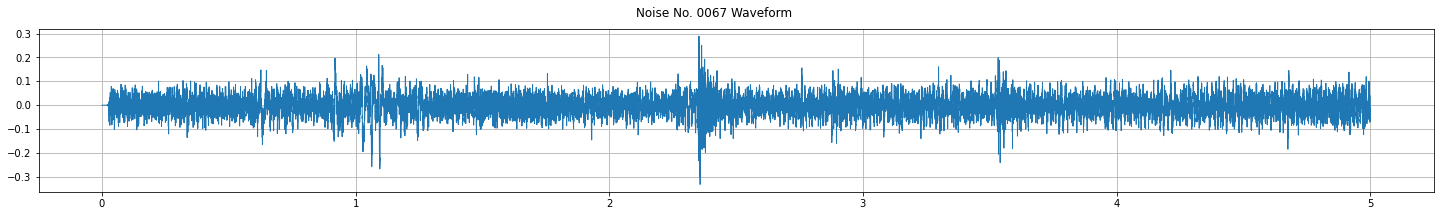

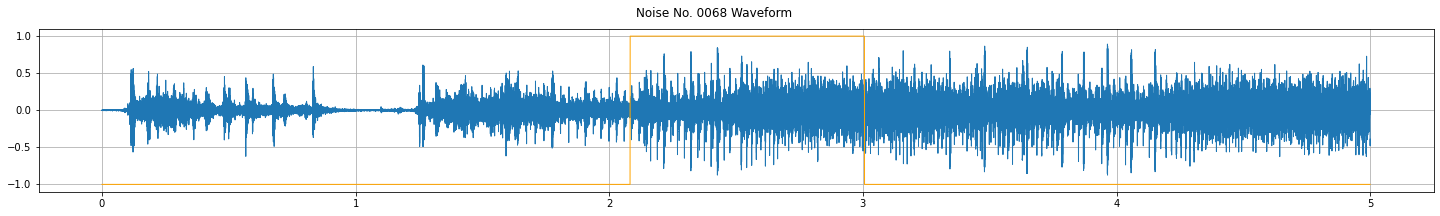

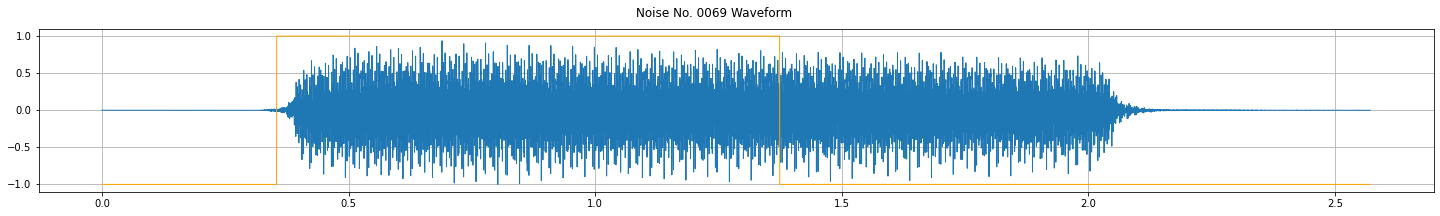

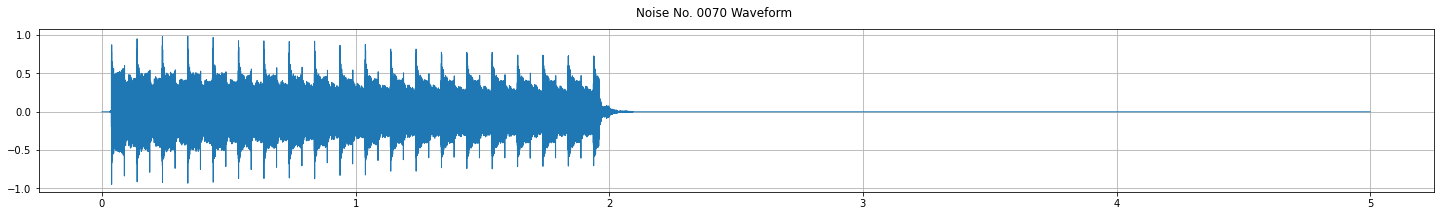

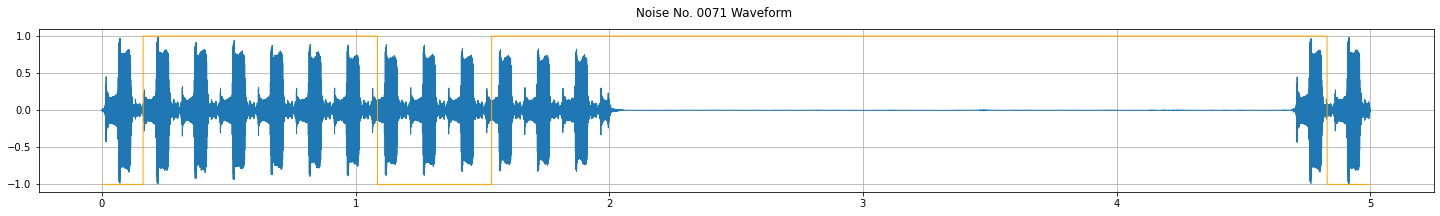

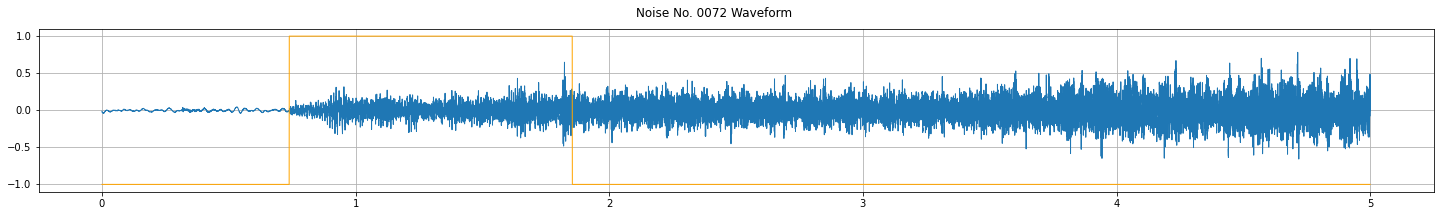

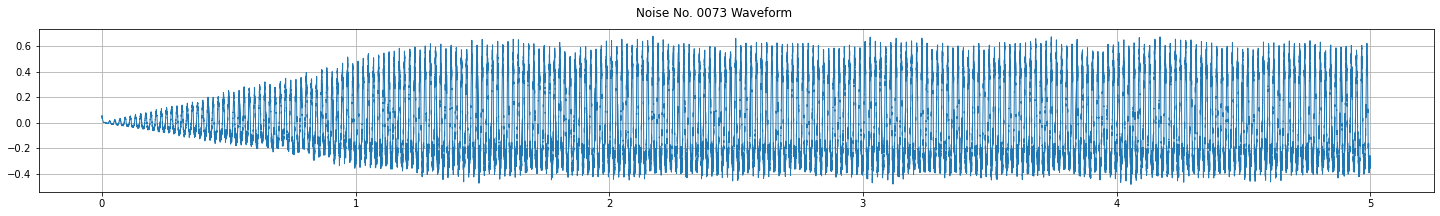

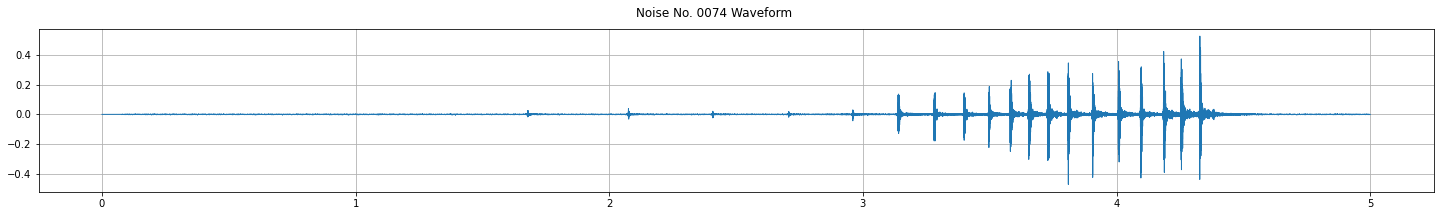

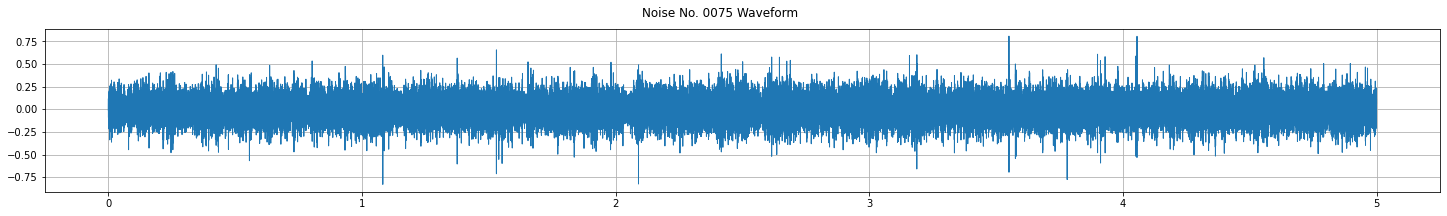

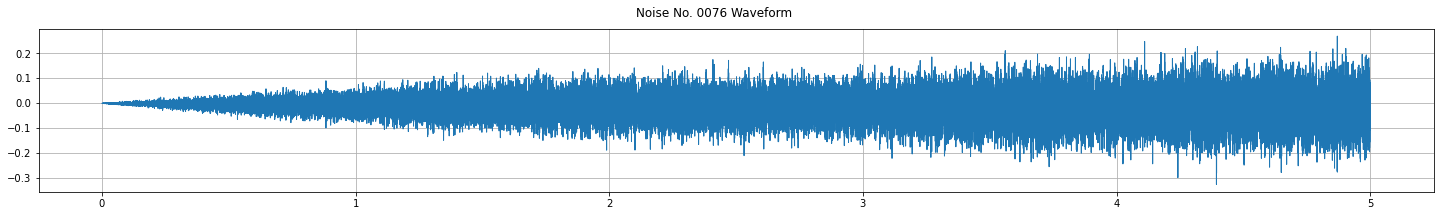

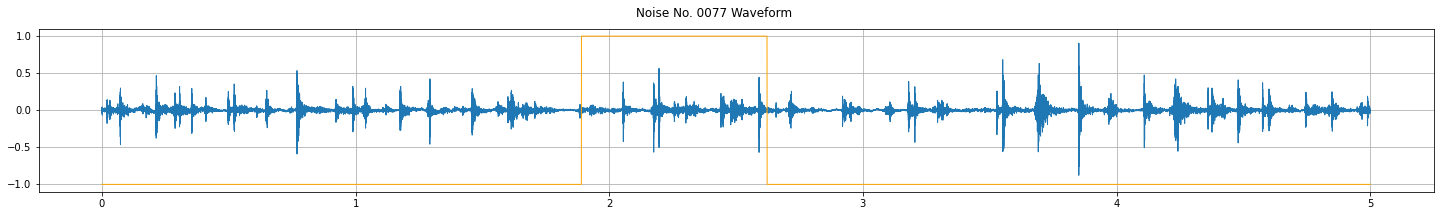

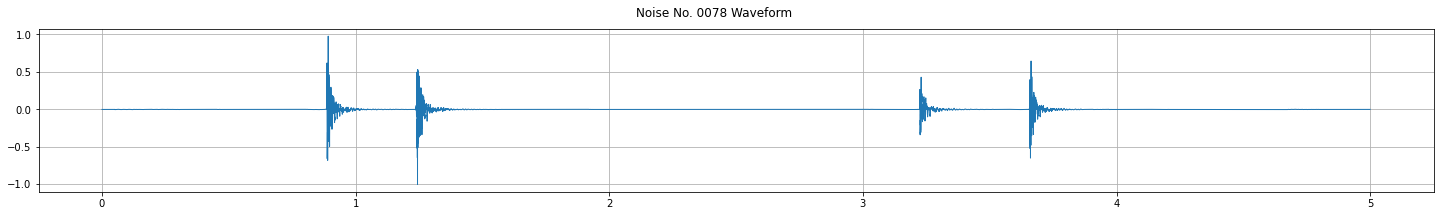

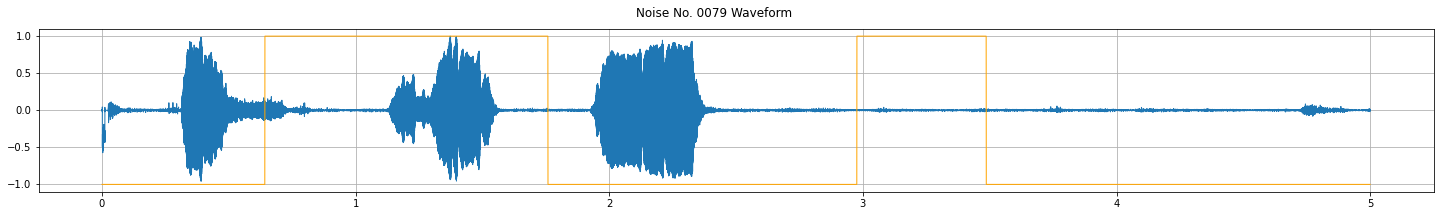

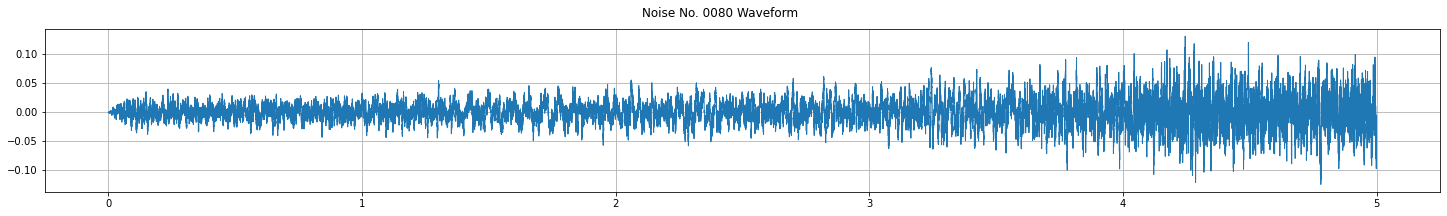

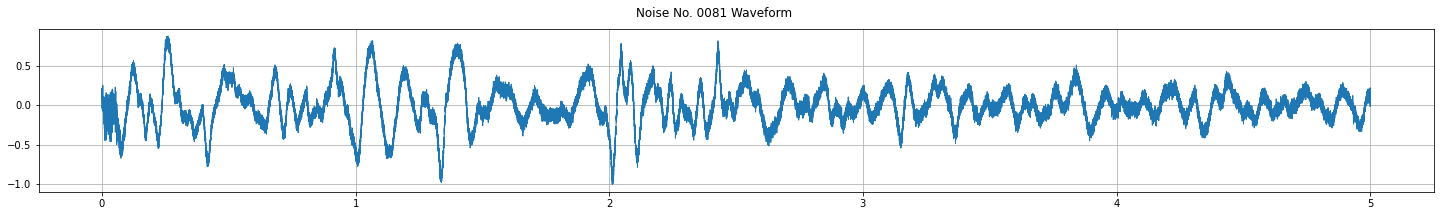

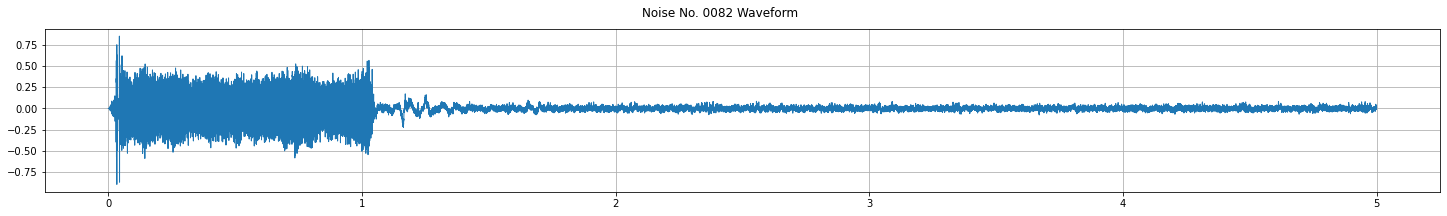

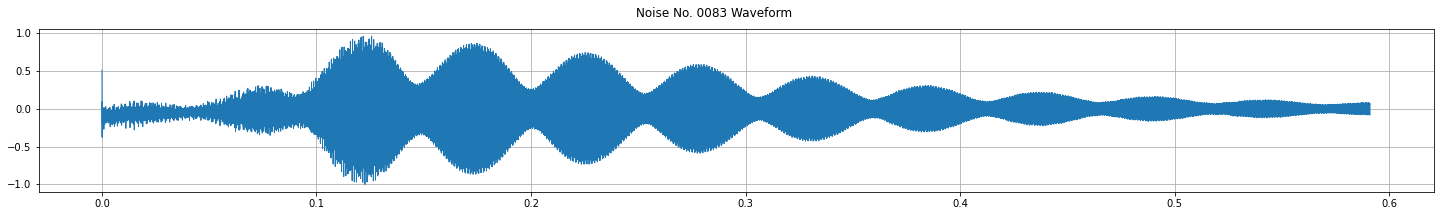

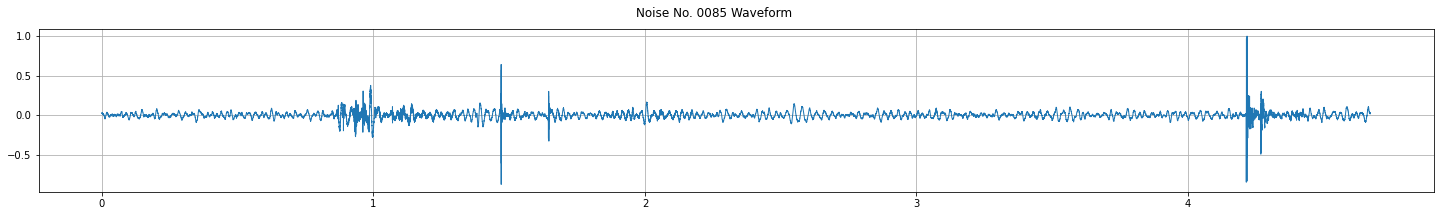

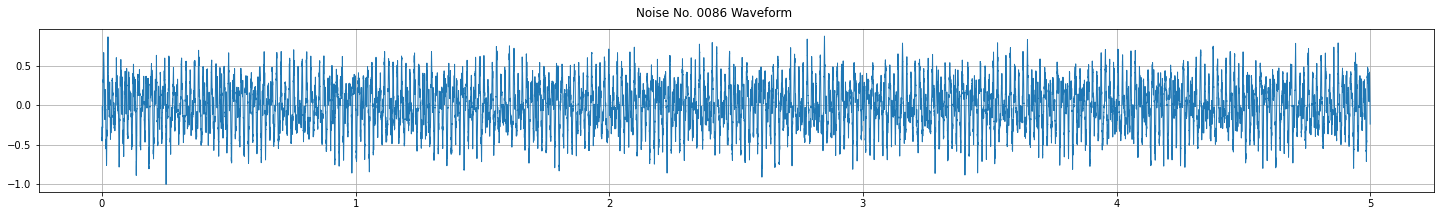

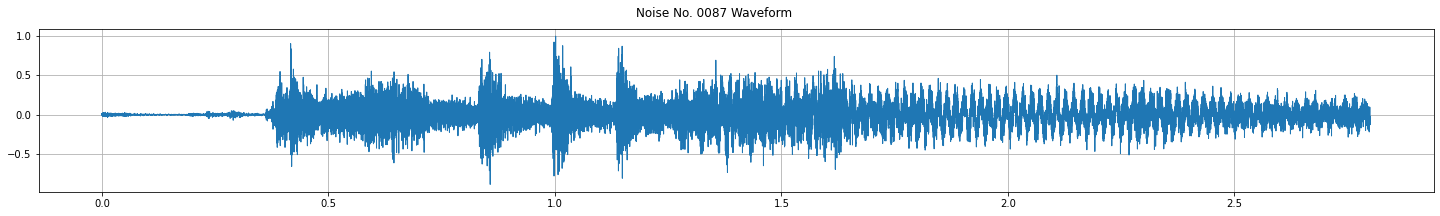

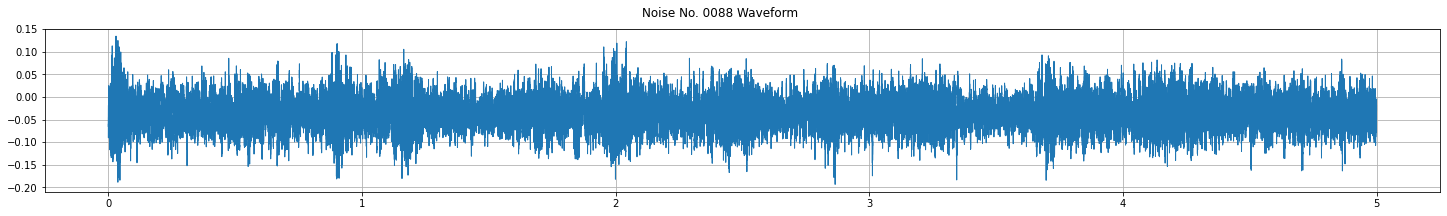

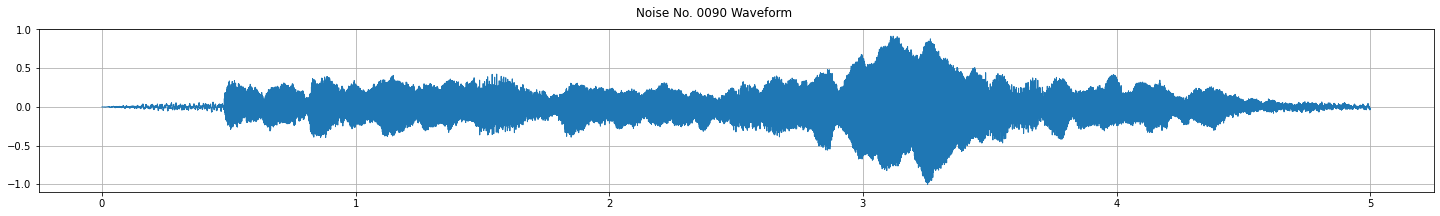

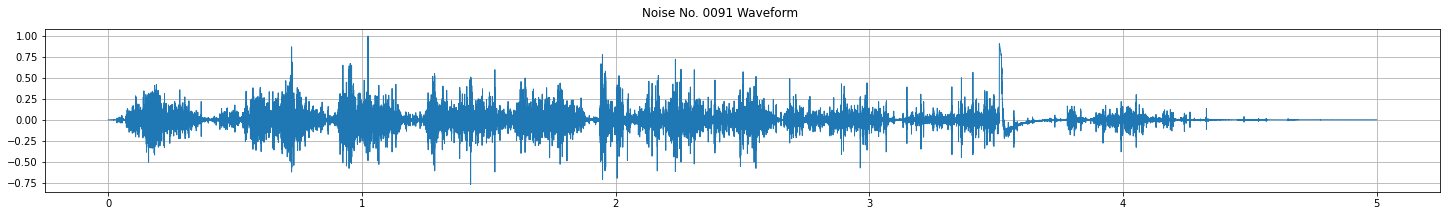

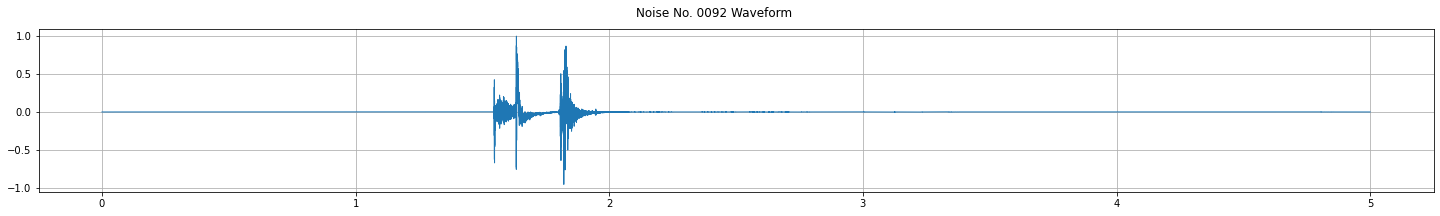

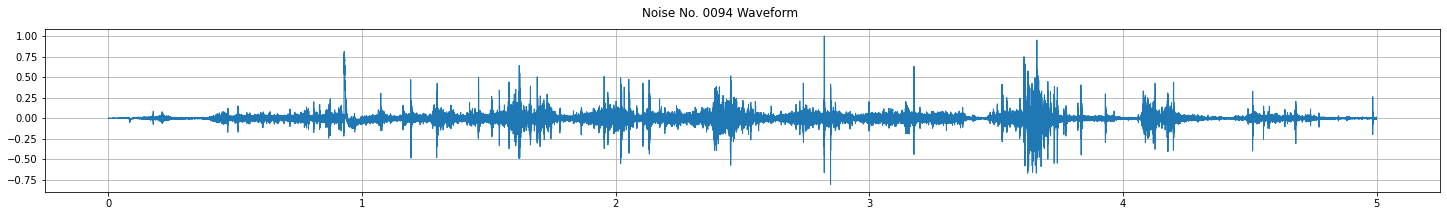

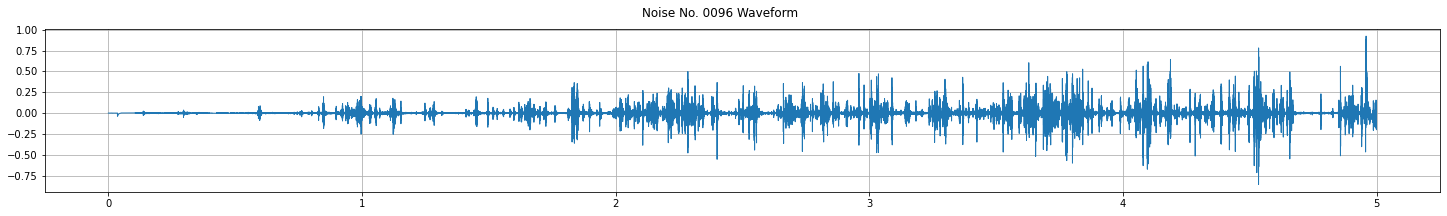

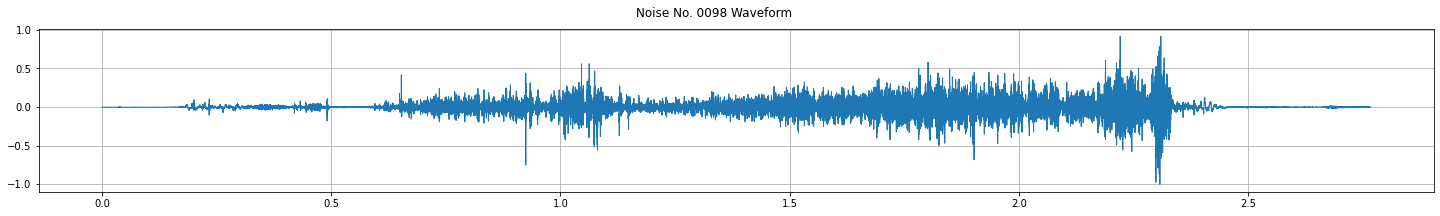

In [ ]:
import glob, os
start_second = 0 
end_second = 5
total_experiments = 100
accuracy, false_positives = 0, 0
failed_experiment, experiments = 0, 0 
for file in glob.glob("data/musan/noise/free-sound/*.wav"):
    experiments += 1
    summation = 0
    wav_path = file
    waveform, sample_rate, metadata = pyutils.load_audio_data(wav_path, start_second = start_second, end_second = end_second)
    # validation = pyutils.get_mat_y_labels(wav_path.replace('.wav','.mat'),sample_rate=sample_rate,start_second=start_second,end_second=end_second)
    speech_timestamps = get_speech_timestamps(waveform, model, sampling_rate = sample_rate)
    mask = pyutils.create_activation_mask(speech_timestamps, waveform.shape[1])
    summation = sum(mask*1)
    false_positives += summation
    if summation > 0:
        failed_experiment += 1
    pyutils.plot_waveform(waveform, title='Noise No. ' + str(file[28+17:28+21] + " Waveform"), sample_rate = sample_rate, mask = mask)
    if experiments == total_experiments:
        break
accuracy = false_positives/(end_second*sample_rate*experiments)
experiment_accuracy = failed_experiment/experiments